# Mudcard
- **How could we tell that the learning rate is too large?**
    - let's go back to the previous lecture notes and increase the learning rate!
- **What's so special about the sigmoid function? Are there any other functions that are used to transform the output of a linear regression into a probability?**
    - it's derivative is quick to calculate :)
    - yes, there are other functions that might work for example tanh has a similar although not quite the same shape but its derivative is numerically costly to calculate
- **I have a question about gradient descent; How do we know when we should stop repeating until it converge?**
- **How to determine what number should we set for learning rate and iteration for gradient descent?**
    - you need to plot the cost function history to figure that out
    - generally speaking, the smaller the learning rate, the larger the iteration should be
- **can i get further explanation why gradient_descent is worse then sklearn other than just illustration!**
    - sklearn implements the algorithms in a version of c called cython which is faster than my naive python implementation
    - sklearn's version of gradient descent is also much more sophisticated than my naive algorithm
    - read up on stochastic gradient descent and adaptive learning rates
- **For R^2, one we can interpret it as the percentage of the variation that can be interpret by our model. In this case, what does -1 represent?**
    - in statistics, R2 is often referred to as the percentage of variance explained by the model
    - that holds more or less true in ML too if the dataset is IID
    - in time series data and if you deal with groups, R2 can be negative in ML
    - in statistics, the R2 is usually calculated using the whole dataset
    - in ML, we have a test set which can have different properties than the training set
- **Is there an easy way to "know" the shape of the loss function? I was a bit confused by the discussion at the end the lecture on local vs. absolute minima**
    - nope, it's difficult to visualize a loss function for more than two intrinsic parameters
- **So is it a good idea to try out¬† both logistic and linear regression models?**
    - NO!
    - use linear regression for regression problems (continuous target variable)
    - use logistic regression for classification problems (categorical target variable)
- **Sigmoid functions vs. linear regression model, are they the same and why do they have different names**
    - they are not the same so they have different names :)
- **can we use sigmoid transformation on standardscalared data?**
    - you don't need to do sigmoid transformation, sklearn will do it for you
- **Why was the grid implementation not able to find 1,32 as the minimum?**
    - print out the grid
    - the grid only contained 0 and 2 and no values in between, the grid is discreet
- **Can you only use logistic regression for classification, or can you use it for regression problems as well?**
    - only for classification
- **Mathematically, how is stochastic gradient descent different from gradient descent that allows us to find the global minimum?**
    - read more [here](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
- **is there a case where the brute force method would be preferred?**
    - I cannot think of any
- **To what extent do we need to understand the mathematical models behind ML algorithms (gradient descent, logloss, etc.) for this class?**
    - you learn for yourself, not for me
    - the final exam is open-book so I obviously won't ask questions you can simply copy-paste from the notebooks if that's what you mean
    - you'll get questions on these ML concepts during the interview so getting a job without understanding them is difficult
- **What was the purpose of illustrating the gradient descent method in class, when sklearn is faster? Does the latter work more or less using principles similar to the gradient descent method?**
    - you need to understand what sklearn does but it's not easy to dissect sklearn's source code
- **What happens if a gradient descent there are two 'valleys' or bowls where one is lower than the other; therefore, the lower one would indicate the best set of parameters. How do we¬† make sure that our gradient descent reaches the lower 'valley'/bowl?**
    - that's the problem stochastic gradient descent solves
    - check the link above
- **Are the sigmoid functions for logistic regressions made with a cutoff that we choose? For example could we make it that probability >0.75 is Yes else No? or is the threshold usually 0.5. Can we produce confidence intervals for these measurements?**
    - the threshold is usually 50% but as you saw during the lectures on the evalution metric, sometimes p_crit is tuned

## Regularization

By the end of this lecture, you will be able to
- Describe why regularization is important and what are the two types of regularization
- Describe how regularized linear regression works
- Describe how regularized logistic regression works


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe why regularization is important and what are the two types of regularization**
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


## Let's work with a new example dataset

(40, 1)
(40,)


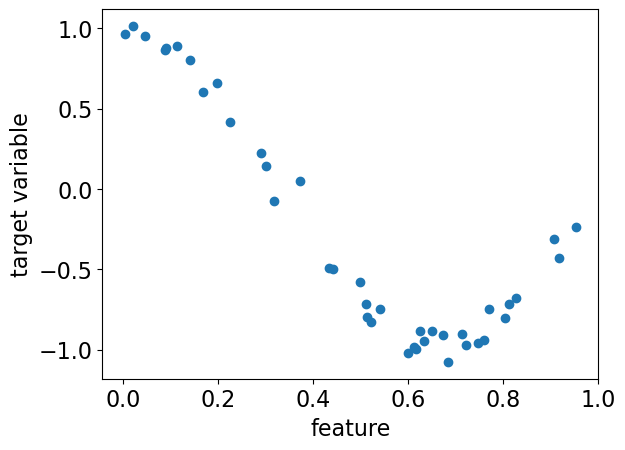

In [1]:
# load packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

df = pd.read_csv('data/regularization_example.csv')
X_ori = df['x0'].values.reshape(-1, 1)
y = df['y'].values
print(np.shape(X_ori))
print(np.shape(y))

# visualize the data
plt.scatter(X_ori,y)
plt.xlabel('feature')
plt.ylabel('target variable')
plt.show()

In [2]:
# lets generate more features because a linear model will obviously be insufficient to fit the data well
pf = PolynomialFeatures(degree = 20,include_bias=False)
X = pf.fit_transform(X_ori)
print(np.shape(X))
print(pf.get_feature_names())

(40, 20)
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15', 'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20']


/Users/azsom/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## We split data into train and validation!

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
print(np.shape(X_train),np.shape(y_train))
print(np.shape(X_val),np.shape(y_val))

(32, 20) (32,)
(8, 20) (8,)


## Let's train and validate some linear regression models

### Use the first feature only

intercept: 0.8018842867499771
w: [-2.08151827]
train MSE: 0.13964692457239292
val MSE: 0.17142516062337293


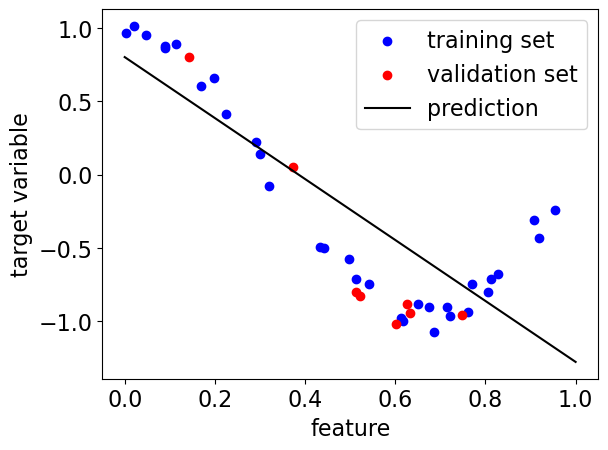

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# let's use only the first feature
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train[:,:1], y_train)
print('intercept:',linreg.intercept_)
print('w:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train[:,:1]))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val[:,:1]))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,100)
plt.scatter(X_train[:,0],y_train,color='b',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(x_model.reshape(-1,1)),color='k',label='prediction')

plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


### Use all features

intercept: 0.9520757590563689
ws: [ 2.94556467e+00  1.78575224e+02 -1.07852987e+04  7.71588160e+04
  3.57083482e+06 -9.66895422e+07  1.20126203e+09 -9.39908662e+09
  5.13303355e+10 -2.05802411e+11  6.23129909e+11 -1.44706005e+12
  2.59415710e+12 -3.58595231e+12  3.78788495e+12 -3.00091345e+12
  1.72536419e+12 -6.79474340e+11  1.63872612e+11 -1.82456642e+10]
train MSE: 0.002223656221532701
val MSE: 0.032878428680030686


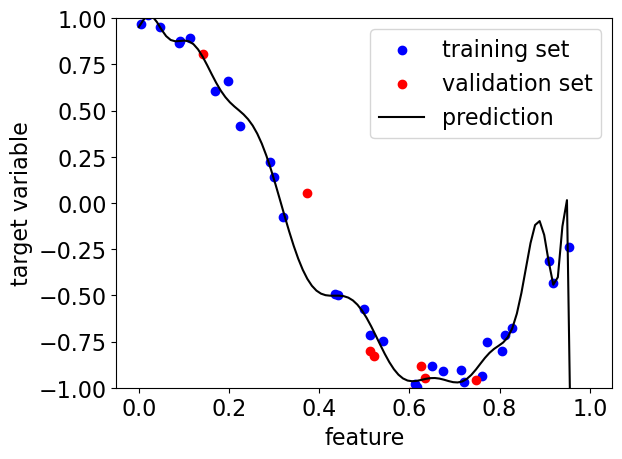

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# use all features
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
print('intercept:',linreg.intercept_)
print('ws:',linreg.coef_)

train_MSE = mean_squared_error(y_train,linreg.predict(X_train))
val_MSE = mean_squared_error(y_val,linreg.predict(X_val))
print('train MSE:',train_MSE)
print('val MSE:',val_MSE)


# let's visualuze the model
x_model = np.linspace(0,1,100)
plt.scatter(X_train[:,0],y_train,color='b',label='training set')
plt.scatter(X_val[:,0],y_val,color='r',label='validation set')
plt.plot(x_model,linreg.predict(pf.transform(x_model.reshape(-1,1))),color='k',label='prediction')
plt.ylim([-1,1])
plt.xlabel('feature')
plt.ylabel('target variable')
plt.legend()
plt.show()


## What to do?
- the model is visibly performs poorly when only the original feature is used
- the model performs very good on the training set but poorly on the validation set when all features are used
    - the ws are huge!

## Regulazation solves this problem!


## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- **Describe how regularized linear regression works**
- <font color='LIGHTGRAY'>Describe how regularized logistic regression works</font>


## Regularization to the rescue!
- let's change the cost function and add a <font color='RED'>penalty term</font> for large ws
- **Lasso regression**: regularize using the l1 norm of w:
   
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|w_j|}$</center>   
   
- **Ridge regression**: regularize using the l2 norm of w:
   
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} w_j^2}$</center>

- $\alpha$ is the regularization parameter (positive number), it describes how much we penalize large ws

- With the cost function changed, the derivatives in gradient descent need to be updated too!

## Feature selection with Lasso regularization
- Least Absolute Shrinkage and Selection Operator
- cost = MSE + $\alpha$ * l1 norm of $w$
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|w_j|}$</center>  
- ideal for feature selection
- as $\alpha$ increases, more and more feature weights are reduced to 0.

In [6]:
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-7,0,29)
ws = []
models = []
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Lasso(alpha=alpha[i],max_iter=100000000)
    lin_reg.fit(X_train, y_train)
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

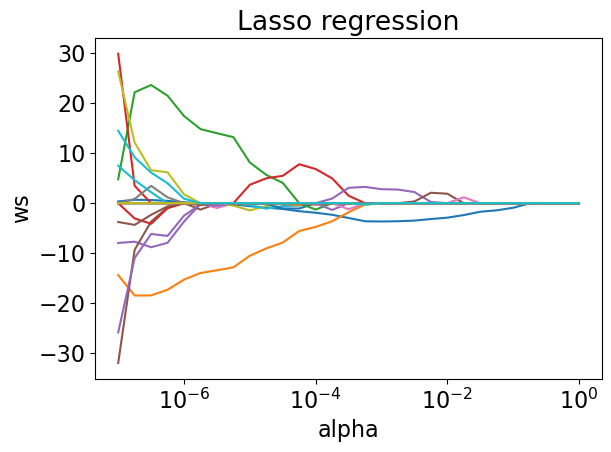

In [7]:
plt.plot(alpha, ws)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Lasso regression')
plt.tight_layout()
plt.savefig('figures/lasso_coefs.png',dpi=300)
plt.show()

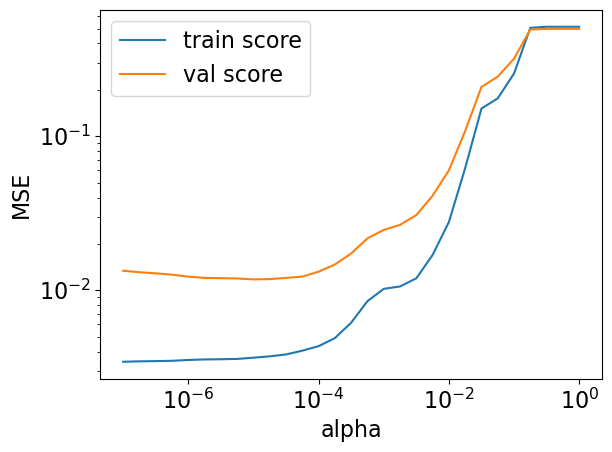

In [8]:
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_lasso.png',dpi=300)
plt.show()

## Bias vs variance
- Bias: the model performs poorly on both the train and validation sets
    - high alpha in our example
- the model performs very well on the training set but it performs poorly on the validation set
    - low alpha in our example
    - lowering the alpha further would improve the train score but the validation score would increase
    - we don't do it because of convergence issues

# The bias-variance trade off
- the curve of the validation score as a function of a hyper-parameter usually has a U shape if evaluation metric needs to be minimized, or an inverted U if the metric needs to be maximized
- choose the hyper-parameter value that gives you the best validation score

##  Quiz
Which alpha value gives the best validation score? Visualize that model! 

## The bias-variance tradeoff with Ridge regularization
- cost = MSE + $\alpha$ * l2 norm of $w$
<center>$L(w) = \frac{1}{n}\sum_{i=1}^{n}[(w_0 + \sum_{j=1}^{m} w_j  x_{ij}- y_i)^2] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} w_j^2}$</center>

- as $\alpha$ approaches 0, we reproduce the linear regression weights
- small $\alpha$ creates high variance
- large $\alpha$ creates high bias

In [9]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-10,0,51)

# arrays to save train and test MSE scores
train_MSE = np.zeros(len(alpha))
val_MSE = np.zeros(len(alpha))

ws = []

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Ridge(alpha=alpha[i])
    lin_reg.fit(X_train, y_train)
    ws.append(lin_reg.coef_)
    # train and test scores
    train_MSE[i] = mean_squared_error(y_train,lin_reg.predict(X_train))
    val_MSE[i] = mean_squared_error(y_val,lin_reg.predict(X_val))

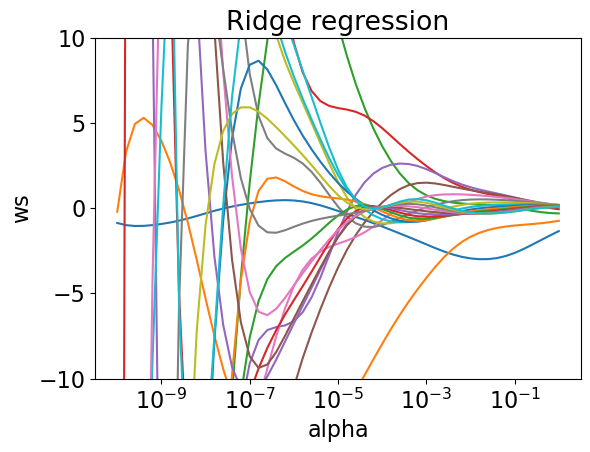

In [10]:
plt.plot(alpha, ws) 
plt.semilogx()
plt.ylim([-1e1,1e1])
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Ridge regression')
plt.tight_layout()
plt.savefig('figures/ridge_coefs.png',dpi=300)
plt.show()

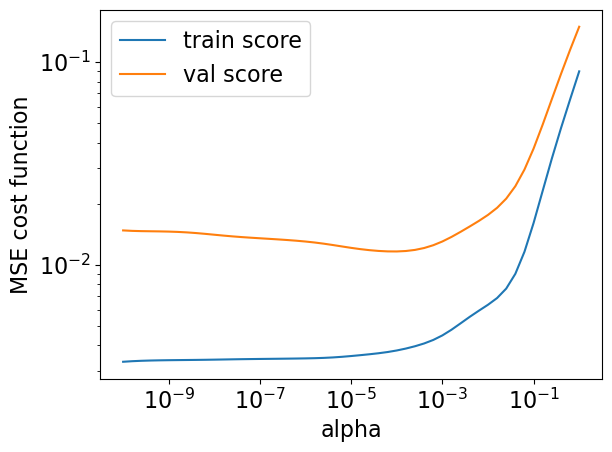

In [11]:
plt.plot(alpha,train_MSE,label='train score')
plt.plot(alpha,val_MSE,label='val score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE cost function')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_ridge.png',dpi=300)
plt.show()

## Quiz
Which $\alpha$ gives us the best tradeoff between bias and variance?

## <font color='LIGHTGRAY'>Regularization</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe why regularization is important and what are the two types of regularization</font>
- <font color='LIGHTGRAY'>Describe how regularized linear regression works</font>
- **Describe how regularized logistic regression works**





## Logistic regression
- Recap: the logloss metric is the cost function

<center>$L(w) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>
<center>$L(w) =  - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}})]$</center>

   - the logloss metric with l1 regularization

<center>$L(w) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}))] + \color{red}{ \frac{\alpha}{m} \sum_{j=0}^{m}|w_j|}$</center>

   - the logloss metric with l2 regularization

<center>$L(w) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}))] + \color{red}{\frac{\alpha}{m} \sum_{j=0}^{m} w_j^2}$</center>

## Logistic regression in sklearn

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(penalty='l1', C = 1/alpha) # C is the inverse of the regularization strength
log_reg_l2 = LogisticRegression(penalty='l2', C = 1/alpha)
# fit, predict, predict_proba are available 
# log_reg.coef_ returns the w values


In [13]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's